In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#PSEUDO CODE

#try for K clusters
    #randomly initialize k centers 

    #while not converged
        #assign each point to nearest cluster/mean
        #Update means as new centers

    # calculate total variation

# plot reduction in variance vs values of k
# Max reduction = ELBOW PLOT gives ideal value of k
# Use the 

In [28]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def manhatten_dist(x1, x2):
    return np.sum(np.abs((x1-x2)))

class K_Means:

    def __init__(self, max_itrs = 100) :
        self.max_itrs = max_itrs

        #list to store the total variatins 
        self.total_var = []


    def find_k(self, Data, k_max = 5) :
        self.k_max = k_max
        self.Data = Data

        #Trying different values of k
        for k in range(2, self.k_max) :
            self.predict(k, self.Data)

            #Calculating total variation, for given k
            self.total_var.append( self._variation(self.centers, self.cluster_idx) )
        
        #The ELBOW Plot
        # Plot total-variation against k values
        plt.plot(range(2, k_max), self.total_var)       

            
    def predict(self, k, Data) :
        self.k = k
        self.Data = Data
        self.n_samples, self.n_features = Data.shape    


        #Initialize empty lists
        self.centers = []
        #Above list is to store the centers

        self.cluster_idx = [[] for _ in range(k)]
        #Each nested list in the above will represent a cluster 
        # andwill store the indices of the samples assigned to that cluster


        # INITIALIZE centers randomly
        np.random.seed(1)
        inital_centers_indices = np.random.choice(self.n_samples, k, replace = False)
        self.centers = [Data[i] for  i in inital_centers_indices]
        

        #Now, we OPTIMIZE the cluster centers
        for _ in range(self.max_itrs) :

            #assign each point to nearest cluster/mean
            self.cluster_idx = self._cluster(self.centers)

            #Update centers as the means of new clusters
            old_centers = self.centers
            self.centers = self._get_means(self.cluster_idx)

            #Check if converged?
            #diff = [euclidean_distance(old_centers[i], self.centers[i]) for i in range(k)]
            diff = [manhatten_dist(old_centers[i], self.centers[i]) for i in range(k)]
            if(sum(diff) == 0) :
                break
        
        #Now, we have the best clusters for given value of k.
        # Cluster - we have the "centers", and the indexes (cluster_idx) belonging to each clusters
            


    def _cluster(self, centers) : 

        #we want to assign each point to it's nearest center
        clusters = [[] for _ in range(self.k)]

        for sample_idx, sample in enumerate(self.Data) :
            cluster_no = self._closest_center(sample, self.centers)
            clusters[cluster_no].append(sample_idx)

        return clusters

    def _closest_center(self, sample, centers) :
        #Distances of current sample to all the current centers
        #distances = [euclidean_distance(sample, c) for c in centers]
        distances = [manhatten_dist(sample, c) for c in centers]
        return np.argmin(distances)



    def _get_means(self, cluster_idx) :
        #we want to return the means of each (nested) cluster
        means = [[] for _ in range(self.k)]
        
        for cluster_no, cluster in enumerate(cluster_idx) :
            c_mean = np.mean(self.Data[cluster], axis = 0)
            means[cluster_no] = c_mean
        return means


    def _variation(self, centers, clusters) :
        # we have k clusters and k centers...
        # we want to sum up the total variation in each of them
        total_var = 0

        for cluster_no, cluster in enumerate(clusters) :

            for sample_idx, sample in enumerate(self.Data[cluster]) :

                ds = manhatten_dist(sample, centers[cluster_no]) 

                total_var += ds

            '''print(np.array(cluster).shape,'\n', np.array(centers[cluster_no]).shape)
            #ds = euclidean_distance(self.Data[cluster], centers[cluster_no])
            ds = manhatten_dist(self.Data[cluster], self.Data[centers[cluster_no]])
            total_var += np.sum(ds)'''
            
        return total_var


    def _labels(self) :
        # we can create a list of the clusters number each sample belongs to - c_labels_list
        c_lables = np.zeros(self.n_samples)        
        for cluster_no, cluster in enumerate(self.cluster_idx) :
            for sample_idx in cluster :
                c_lables[sample_idx] = cluster_no
        return c_lables

In [32]:
#GETTING THE DATA
df = pd.read_csv("/weatherAUS.csv")

In [34]:
#DEALING WITH NON-NUMERIC DATA
#df['Location'].unique()

Location_list = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru']
       
df['Location'].replace(Location_list, range(len(Location_list)), inplace = True)
df['RainToday'].replace(['Yes', 'No'], [1, 0], inplace = True)
df['RainTomorrow'].replace(['Yes', 'No'], [1, 0], inplace = True)

#This way the 'distance' in the location feature of two datapoints of the same place will be zero, and the algorithm will correlate them
#But one problem with this approach of dealing with non-numeric data is that - 
# Now the algorithm will think Albury is 'closer' and more related to BadgeryCreek than Cobar
# SO the solution would be to create a n-dimensional vector with all zeroes except one that represents the feature we are talking about
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,0,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,0,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,0,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,0,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,2014-01-12,3,17.5,27.2,0.0,6.8,NaN,ENE,30.0,SSE,...,61.0,62.0,1017.1,1016.4,0.0,1.0,25.5,26.5,0.0,0.0
10807,2014-01-13,3,17.3,27.3,0.0,7.8,NaN,SSE,35.0,WSW,...,75.0,64.0,1020.2,1018.9,7.0,5.0,22.5,25.8,0.0,0.0
10808,2014-01-14,3,18.3,27.1,0.0,3.8,12.2,SW,24.0,SSW,...,67.0,55.0,1021.7,1020.8,6.0,1.0,24.8,25.9,0.0,0.0
10809,2014-01-15,3,17.8,28.1,0.0,7.4,12.6,ENE,33.0,SW,...,66.0,62.0,1023.2,1021.6,7.0,2.0,24.6,26.7,0.0,0.0


In [35]:
#Imputation - Replacing missing data with the means/modes

#Impute Modes for Direstions
df['WindGustDir'].replace(np.nan, 'W', inplace = True)
df['WindDir9am'].replace(np.nan, 'N', inplace = True)
df['WindDir3pm'].replace(np.nan, 'SE', inplace = True)

impute_mean = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for f in impute_mean :
       df[f].replace(np.nan, (np.mean(df[f])), inplace=True)


# A better way would be to replace the missing data points of the mean of that particular place, 
# instead of teh whole thing's mean
#But that won't work here, as some cities have no data at all for some features
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,5.628896,7.718404,W,44.0,W,...,71.000000,22.000000,1007.700000,1007.100000,8.000000,4.335496,16.90000,21.800000,0.0,0.0
1,2008-12-02,0,7.4,25.1,0.0,5.628896,7.718404,WNW,44.0,NNW,...,44.000000,25.000000,1010.600000,1007.800000,4.202653,4.335496,17.20000,24.300000,0.0,0.0
2,2008-12-03,0,12.9,25.7,0.0,5.628896,7.718404,WSW,46.0,W,...,38.000000,30.000000,1007.600000,1008.700000,4.202653,2.000000,21.00000,23.200000,0.0,0.0
3,2008-12-04,0,9.2,28.0,0.0,5.628896,7.718404,NE,24.0,SE,...,45.000000,16.000000,1017.600000,1012.800000,4.202653,4.335496,18.10000,26.500000,0.0,0.0
4,2008-12-05,0,17.5,32.3,1.0,5.628896,7.718404,W,41.0,ENE,...,82.000000,33.000000,1010.800000,1006.000000,7.000000,8.000000,17.80000,29.700000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,2014-01-12,3,17.5,27.2,0.0,6.800000,7.718404,ENE,30.0,SSE,...,61.000000,62.000000,1017.100000,1016.400000,0.000000,1.000000,25.50000,26.500000,0.0,0.0
10807,2014-01-13,3,17.3,27.3,0.0,7.800000,7.718404,SSE,35.0,WSW,...,75.000000,64.000000,1020.200000,1018.900000,7.000000,5.000000,22.50000,25.800000,0.0,0.0
10808,2014-01-14,3,18.3,27.1,0.0,3.800000,12.200000,SW,24.0,SSW,...,67.000000,55.000000,1021.700000,1020.800000,6.000000,1.000000,24.80000,25.900000,0.0,0.0
10809,2014-01-15,3,17.8,28.1,0.0,7.400000,12.600000,ENE,33.0,SW,...,66.000000,62.000000,1023.200000,1021.600000,7.000000,2.000000,24.60000,26.700000,0.0,0.0


In [36]:
df['WindDir3pm'].mode()
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [37]:
#Now we will be creating 2 coordinates for each Direction feature and assigning 
dir_list = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
x_coordis = [1, 0.924, 0.707, 0.383, 0, -0.383, -0.707, -0.924, -1, -0.924, -0.707, -0.383, 0, 0.383, 0.707, 0.924]
y_coordis = [0, 0.3827, 0.7071, 0.9239, 1, 0.9239, 0.7071, 0.3827, 0, -0.3827, -0.7071, -0.9239, -1, -0.9239, -0.7071, -0.3827]

L = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for s in L :
    df[s + '_x'] = df[s]
    df[s + '_x'].replace(dir_list, x_coordis, inplace=True)

    df[s + '_y'] = df[s]
    df[s + '_y'].replace(dir_list, y_coordis, inplace=True)


df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
0,2008-12-01,0,13.4,22.9,0.6,5.628896,7.718404,W,44.0,W,...,16.90000,21.800000,0.0,0.0,-1.000,0.0000,-1.000,0.0000,-0.924,0.3827
1,2008-12-02,0,7.4,25.1,0.0,5.628896,7.718404,WNW,44.0,NNW,...,17.20000,24.300000,0.0,0.0,-0.924,0.3827,-0.383,0.9239,-0.924,-0.3827
2,2008-12-03,0,12.9,25.7,0.0,5.628896,7.718404,WSW,46.0,W,...,21.00000,23.200000,0.0,0.0,-0.924,-0.3827,-1.000,0.0000,-0.924,-0.3827
3,2008-12-04,0,9.2,28.0,0.0,5.628896,7.718404,NE,24.0,SE,...,18.10000,26.500000,0.0,0.0,0.707,0.7071,0.707,-0.7071,1.000,0.0000
4,2008-12-05,0,17.5,32.3,1.0,5.628896,7.718404,W,41.0,ENE,...,17.80000,29.700000,0.0,0.0,-1.000,0.0000,0.924,0.3827,-0.707,0.7071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,2014-01-12,3,17.5,27.2,0.0,6.800000,7.718404,ENE,30.0,SSE,...,25.50000,26.500000,0.0,0.0,0.924,0.3827,0.383,-0.9239,0.707,0.7071
10807,2014-01-13,3,17.3,27.3,0.0,7.800000,7.718404,SSE,35.0,WSW,...,22.50000,25.800000,0.0,0.0,0.383,-0.9239,-0.924,-0.3827,0.383,-0.9239
10808,2014-01-14,3,18.3,27.1,0.0,3.800000,12.200000,SW,24.0,SSW,...,24.80000,25.900000,0.0,0.0,-0.707,-0.7071,-0.383,-0.9239,0.924,-0.3827
10809,2014-01-15,3,17.8,28.1,0.0,7.400000,12.600000,ENE,33.0,SW,...,24.60000,26.700000,0.0,0.0,0.924,0.3827,-0.707,-0.7071,0.924,0.3827


In [38]:
#Feature Selection
features = ['MinTemp', 'MaxTemp', 
        'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 
       'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 
       'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 
       'WindGustDir_x', 'WindGustDir_y', 
       'WindDir9am_x', 'WindDir9am_y',
       'WindDir3pm_x', 'WindDir3pm_y'
       ]
            
Data = df.loc[:, features].values
Data.shape


(10811, 22)

In [39]:
#Data Scaling
Data = ( Data - Data.mean(axis = 0) / (Data.max(axis = 0) - Data.min(axis = 0)) )

In [44]:
#Implementing the algorithm
aus = K_Means(max_itrs=200)

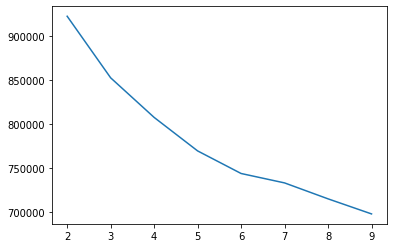

In [61]:
aus.find_k(Data=Data, k_max=10)
#The value of k that brings about the maximum drop in total variation is the ideal value for k

In [62]:
# From the above plot, we can see k=6 brings teh maximum drop in total variation
#  For 8 and more clusters the variation decreases more, as the clusters become smaller
#  But they will be harder to vishualize on pca, and will require more computation
#  Hence we stick with 6 :)

#Making / Predicting The Clusters
aus.predict(k=6, Data=Data)

In [64]:
# Printing the centers of the clusters
dfc = pd.DataFrame(aus.centers)
dfc

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,16.853164,32.676217,0.223923,8.151132,7.523748,40.528734,13.716580,16.072792,42.307258,20.275621,...,2.653765,3.062147,22.970804,31.118055,-0.082445,0.028871,0.340930,0.038444,-0.186100,-0.009081
1,13.273071,18.506830,16.356934,4.634914,5.330347,40.404871,14.375851,16.846698,88.144881,81.817784,...,6.043406,5.927089,15.242533,16.725074,-0.113636,-0.079036,-0.204509,-0.040356,-0.101562,-0.107252
2,7.942283,21.856479,0.358387,4.714821,7.462303,30.839281,10.242483,13.342970,59.685639,37.020761,...,2.795069,3.039456,14.600644,20.841873,-0.027719,-0.111147,0.026117,-0.149343,0.043704,-0.117001
3,12.473803,22.274516,2.196350,5.273715,7.428440,52.112185,19.425050,27.042572,60.913580,51.280197,...,3.634776,3.970602,17.543445,20.206427,-0.295734,-0.002511,-0.321361,0.123341,-0.220318,0.001995
4,4.989221,16.567616,0.934255,4.897873,7.059465,24.188083,5.679682,10.445402,87.127416,57.871830,...,4.349452,4.145589,9.373665,15.669941,-0.046296,-0.009668,-0.082176,0.090880,0.024981,-0.025065
5,16.008853,27.032270,2.694898,5.375509,7.154117,34.209772,8.657133,15.134185,76.458368,54.920047,...,4.025024,4.033504,20.284214,25.361048,0.195024,0.014878,-0.014003,-0.015245,0.341107,0.095941


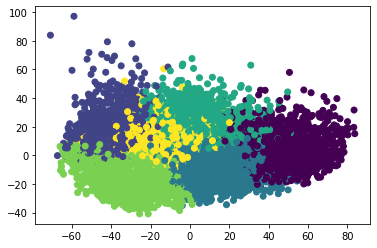

In [63]:
#PCA Plot

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

l = aus._labels()
arr = np.array(Data)

df_2d = pca.fit_transform(arr)

plt.scatter(df_2d[:, 0], df_2d[:, 1], c = l)

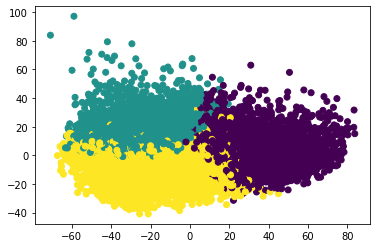

In [65]:
#Just Trying k = 3 for fun :-)

aus2 = K_Means(max_itrs=100)
aus2.predict(k=3, Data=Data)

pca = PCA(n_components=2)
l = aus2._labels()
arr2 = np.array(Data)
df_2d = pca.fit_transform(arr2)
plt.scatter(df_2d[:, 0], df_2d[:, 1], c = l)

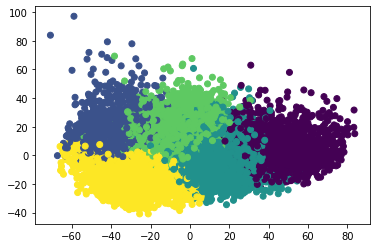

In [66]:
#Just Trying k = 5 for fun :-)

aus3 = K_Means(max_itrs=100)
aus3.predict(k=5, Data=Data)

pca = PCA(n_components=2)
l = aus3._labels()
arr = np.array(Data)
df_2d = pca.fit_transform(arr)
plt.scatter(df_2d[:, 0], df_2d[:, 1], c = l)
